In [1]:
import pandas as pd
df=pd.read_csv('startup_funding.csv')

1)Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [2]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
df.CityLocation.isnull().sum()# this specifies that there are 179 rows with null values

179

In [4]:
df.CityLocation.dropna(inplace=True)# as null rows are of no use for our problem statement we can drop them

In [5]:
df.CityLocation.unique()# after looking at  this data we can see the is typo in bangalore and also we need to handle for multiple cities

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
       'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
       'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
       'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
       'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'Bangalore / San Mateo',
       'New York/ India', 'US/India', 'Gurgaon / SFO', 'Bangalore / USA',
       'New Delhi/ Houston', 'Nagpur', 'Mumbai / Gl

In [6]:
df.CityLocation.replace(['bangalore','Delhi'],['Bangalore','New Delhi'],inplace=True)# handling typos

In [8]:
a=[]
for i in df.CityLocation:
    a.append(i.split('/')[0].strip())# avoiding trailing spaces and handling multiple cities
a    

['Bangalore',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'Hyderabad',
 'Bangalore',
 'Ahmedabad',
 'Gurgaon',
 'Bangalore',
 'Noida',
 'Mumbai',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Hyderabad',
 'Pune',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Hyderabad',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Noida',
 'Hyderabad',
 'Kolkata',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Gurgaon',
 'Gurgaon',
 'New Delhi',
 'New Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'New Delhi',
 'New Delhi',
 'Bangalore',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Mumbai',
 'Gurgaon',
 'Kolkata',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'New Delhi',
 'Gurgaon',
 'New Delhi',
 'Mumbai',
 'Hyderabad',
 'Hyderabad',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Hyderabad',
 'Bangalore',
 'Ahmedabad',
 'Bangalore',
 'New Delhi',
 'Mumbai',
 'Mumbai',
 'New Delhi',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 '

In [9]:
city=pd.Series(a)# city series wich contains clean data

In [10]:
city.unique() 

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'SFO', 'London', 'Seattle',
       'Varanasi', 'Bhopal', 'Jodhpur', 'Boston', 'Belgaum', 'New York',
       'Nagpur', 'India', 'Udaipur', 'Dallas'], dtype=object)

In [11]:
city.value_counts()[:10]# gives the top 10 city according to funding recieed
     

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
dtype: int64

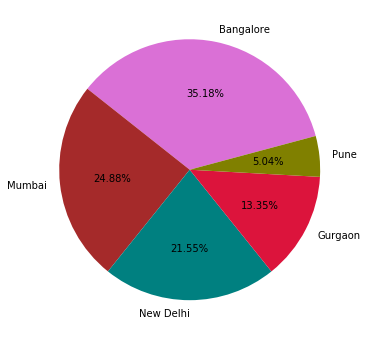

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8, 6))
colors = ( "orchid", "brown", "teal","crimson", "olive")
plt.pie(city.value_counts()[:5].values,labels=city.value_counts()[:5].index,autopct='%.2f%%',startangle=15,colors=colors)
plt.show()

In [17]:
possible_cities=['Bangalore','Mumbai','New Delhi','Gurgaon','Noida']
dic={}
for i in city.value_counts().index:
    if i in possible_cities:
        print(i,end=' ')
        print(city.value_counts().loc[i])
        dic[i]=city.value_counts().loc[i]

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


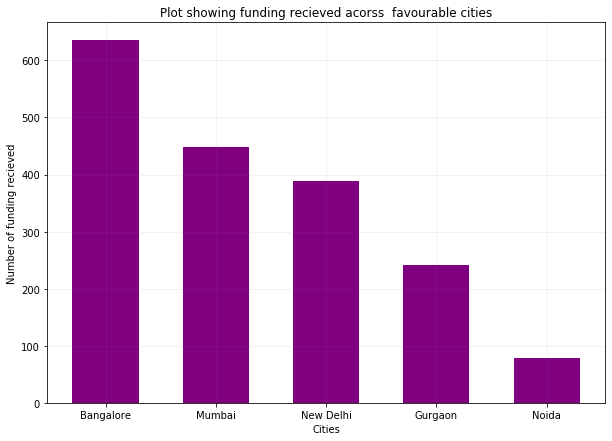

In [37]:

fig = plt.figure(figsize =(10, 7))
plt.grid(color ='grey',linestyle ='-', linewidth = 0.5,alpha = 0.2)
plt.bar(dic.keys(),dic.values(),color='purple',width=0.6)
plt.xlabel('Cities')
plt.ylabel('Number of funding recieved')
plt.title('Plot showing funding recieved acorss  favourable cities')
plt.show()

# 2)

In [21]:
df=pd.read_csv('startup_funding.csv')

In [22]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [23]:
d=df

In [24]:
d.InvestorsName.dropna(inplace=True)#dropping empty values

In [25]:
a=[]
for t in d.InvestorsName:
    a.extend(t.split(','))# multiuple investors
a    

['Kae Capital',
 'Triton Investment Advisors',
 'Kashyap Deorah',
 ' Anand Sankeshwar',
 ' Deepak Jain',
 ' Sadashiva NT',
 ' Arjun Mehta',
 ' Satish Kaul',
 ' Anindya Ghose',
 'Kunal Shah',
 ' LetsVenture',
 ' Anupam Mittal',
 ' Hetal Sonpal',
 'Narottam Thudi',
 ' Shireesh Palle',
 'Reliance Corporate Advisory Services Ltd',
 'Infuse Ventures',
 ' JLL',
 'Asset Management (Asia) Ltd',
 ' Digital Garage Inc',
 'Kalaari Capital',
 ' Nexus India Capital Advisors',
 'International Finance Corporation',
 ' Rocketship',
 ' Accel Partners',
 ' Jungle Ventures',
 ' Shailesh Rao',
 ' Venture Highway',
 'BCCL',
 'Blume Ventures',
 ' Contrarian Capital India Partners',
 ' Emergent Ventures India',
 ' Pallav Nadhani',
 ' Ashish Gupta',
 ' Sharad Sharma',
 ' Sirion Labs',
 'India Quotient',
 ' Shunwei Capital',
 'Sreeram Iyer',
 ' Suvo Sarkar',
 ' Anita Gupta',
 ' Likemind Ventures',
 'Mitsui & Co.',
 'Dunamis Ventures Pte Ltd',
 'Venture Catalysts',
 ' Sourav Ganguly',
 ' Ankit Aditya',
 ' Moksh

In [26]:
at=[]
for i in a:
    at.append(i.strip())# removing trailing spaces
at   

['Kae Capital',
 'Triton Investment Advisors',
 'Kashyap Deorah',
 'Anand Sankeshwar',
 'Deepak Jain',
 'Sadashiva NT',
 'Arjun Mehta',
 'Satish Kaul',
 'Anindya Ghose',
 'Kunal Shah',
 'LetsVenture',
 'Anupam Mittal',
 'Hetal Sonpal',
 'Narottam Thudi',
 'Shireesh Palle',
 'Reliance Corporate Advisory Services Ltd',
 'Infuse Ventures',
 'JLL',
 'Asset Management (Asia) Ltd',
 'Digital Garage Inc',
 'Kalaari Capital',
 'Nexus India Capital Advisors',
 'International Finance Corporation',
 'Rocketship',
 'Accel Partners',
 'Jungle Ventures',
 'Shailesh Rao',
 'Venture Highway',
 'BCCL',
 'Blume Ventures',
 'Contrarian Capital India Partners',
 'Emergent Ventures India',
 'Pallav Nadhani',
 'Ashish Gupta',
 'Sharad Sharma',
 'Sirion Labs',
 'India Quotient',
 'Shunwei Capital',
 'Sreeram Iyer',
 'Suvo Sarkar',
 'Anita Gupta',
 'Likemind Ventures',
 'Mitsui & Co.',
 'Dunamis Ventures Pte Ltd',
 'Venture Catalysts',
 'Sourav Ganguly',
 'Ankit Aditya',
 'Moksh Sports Ventures',
 'Fireside V

In [27]:
invest=pd.Series(at)

In [79]:
invest.value_counts()[:5]

Sequoia Capital         64
Accel Partners          53
Kalaari Capital         44
SAIF Partners           41
Indian Angel Network    40
dtype: int64

# 3)

In [ ]:
df=pd.read_csv('startup_funding.csv')

In [38]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [39]:
df.StartupName.isnull().sum()# no null values

0

In [40]:
df.StartupName.unique()# as the data is too large we need to look lexicographically to identify typos

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Graphene',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [41]:
df.StartupName.sort_values().unique()[520:600]# we identified 'Flipkart.com'as one typo

array(['FindmeaShoe', 'Findow', 'Findyahan', 'Fingerlix', 'Finomena',
       'Fintellix', 'First Eat', 'First Moms Club', 'FirstCry',
       'FirstCry.com', 'FirstTouch', 'Fisdom', 'FitMeIn', 'Fitcircle',
       'Fitmein', 'Fitnapp', 'Fitpass', 'Fitraq.com', 'Fitso',
       'Fitternity', 'FixNix', 'Fixy', 'Flashdoor', 'FlatFurnish',
       'Flatchat', 'Flatpebble', 'FleetRover', 'Flexiloans', 'Flexing It',
       'FlickBay', 'Flickstree', 'FlipClass', 'Flipkart', 'Flipkart.com',
       'Flixy Games', 'Flocareer', 'Flutura', 'Flyrobe', 'Flytxt',
       'Focus Digit', 'FoodAbhi', 'FoodTalkIndia', 'Foodpanda',
       'Footprints Education', 'ForeverShop', 'Formcept', 'Fourseven',
       'Fourth Ambit', 'Fourth Partner Energy', 'Fracktal Works',
       'Fractal Analytics', 'Frankly', 'Frapperz', 'FreeCharge',
       'Freedom Smart Labs', 'Fresh Food Concepts', 'FreshDesk',
       'FreshMenu', 'FreshWorld', 'Freshboxx', 'Freshdesk', 'Freshee',
       'Freshmonk', 'FroyoFit', 'Frsh', 'Frsh.c

In [42]:
df.StartupName.sort_values().unique()[1100:1300]# we identified typos in 'ola cabs',Oyo', 'Oyo Rooms', 'OyoRooms', 'Oyorooms'

array(['MyPoolin', 'MySUN', 'MySeniorDoctor', 'MySmartPrice',
       'MySuperBrain', 'MyTaxiIndia', 'Myeglu', 'Myly', 'Myonsto', 'Myra',
       'Mystifly', 'N.O.W', 'NDTV Wedding portal',
       'NDTV ecommerce venture', 'Naaptol', 'Naaptol.com', 'Nactus',
       'Native Special', 'Naturally Yours', 'NatureNama',
       'Navia Life Care', 'Nayi Disha', 'Near.in', 'NearBuy',
       'NearBuy (previously\xa0 groupon India)', 'NearFox', 'NearU',
       'NeoGrowth', 'NeoStencil', 'Neotrade Analytics', 'NestAway',
       'Nestaway', 'NetLinx', 'Netmeds.com', 'Netree', 'NeuroEquilibrium',
       'NeuroSynaptic', 'Newgen Payments', 'News in shorts',
       'NewsDistill', 'NewsHunt', 'NewsInShorts', 'NewsLaundry',
       'Newspatrolling', 'NextGen', 'NiYO Solutions', 'Niffler',
       'NightStay', 'Nightstay', 'Niki.ai', 'Nimble Wireless',
       'Ninjacart', 'Niramai', 'Nivesh', 'NoBroker', 'Noddapp',
       'Noodle Play', 'Notary Mama', 'Notesgen', 'Noticeboard',
       'Notion Press', 'NowFl

In [43]:
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True)

In [44]:
df.InvestorsName.isnull().sum()#empty values in invesotr name

8

In [45]:
df.InvestorsName.fillna('empty',inplace=True)#filling empty column

In [46]:
investor_startup=set()
for i in range(len(df.InvestorsName)):
    for t in df.InvestorsName.iloc[i].split(','):
            tup=(t.strip(),df.StartupName.iloc[i])
            investor_startup.add(tup)
investor_startup            
            
    
    

{('Jungle Ventures', 'Vayana'),
 ('Delta Partners', 'Knowlarity'),
 ('F-Prime Capital Partners', 'Celes Care'),
 ('Unternehmertum Venture Capital', 'LoyaltyPrime'),
 ('Flipkart Logistics Pvt. Ltd', 'TinyStep'),
 ('Prime Venture Partners', 'MoneyTap'),
 ('91springboard', 'Squadrun'),
 ('Indian Angel Network', 'Shoekonnect'),
 ('Roy Kwan', 'Purple Style Labs'),
 ('Angie Mahtaney', 'Buttercups'),
 ('Intellecap Impact Investment Network', 'Ketto'),
 ('Vertex Ventures', 'Flutura'),
 ('Nexus Venture Partners', 'Infoworks'),
 ('Flipkart', 'Zapr'),
 ('Concur Technologies', 'Cleartrip'),
 ('undisclosed investor', 'Vithi.com'),
 ('Pallav Nadhani', 'The Ken'),
 ('Group of Angel Investors from US/India', 'Cupick'),
 ('Bertelsmann India Investments', 'Kartrocket'),
 ('Arjun Malhotra', 'Octo.ai'),
 ('Astarc Ventures', 'Rapido'),
 ('3one4 Capital', 'Licious'),
 ('Kunal Shah', 'Flyrobe'),
 ('Ratan Tata', 'Invictus Oncology'),
 ('Naman Sarawagi', 'DailyNinja'),
 ('AngelPrime', 'happay'),
 ('Sequoia Ind

In [47]:
investor_startup=list(investor_startup)

In [48]:
data=pd.DataFrame(investor_startup,columns=['investor','startup'])

In [49]:
data.investor.value_counts()

Sequoia Capital                                      50
Accel Partners                                       47
Kalaari Capital                                      41
Indian Angel Network                                 40
                                                     38
Blume Ventures                                       36
Undisclosed Investors                                32
Ratan Tata                                           30
SAIF Partners                                        29
Undisclosed investors                                28
Rajan Anandan                                        23
Tiger Global                                         22
Nexus Venture Partners                               21
Kae Capital                                          20
IDG Ventures                                         20
500 Startups                                         19
Anupam Mittal                                        18
India Quotient                                  

In [50]:
for i in data.investor.value_counts().index[:6]:
    if i!='':
        print(i,end=" ")
        print(data.investor.value_counts().loc[i])

Sequoia Capital 50
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


# 4)

In [51]:
df=pd.read_csv('startup_funding.csv')

In [52]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [53]:
df.InvestmentType.unique()# we observe typos in SeedFunding,Crowd funding,PrivateEquity

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [54]:
df.InvestmentType.replace(['SeedFunding','PrivateEquity','Crowd funding'],['Seed Funding','Private Equity','Crowd Funding'],inplace=True)

In [55]:
df.InvestmentType.fillna('emp',inplace=True)# handling missing values

In [56]:
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True)

In [57]:
df.InvestorsName.fillna('empty',inplace=True)#filling empty column

In [58]:
invest_type=['Crowd Funding','Seed Funding'] # desired investment type 

In [59]:
invest_startup=set()
for i in range(len(df.InvestorsName)):
    if df.InvestmentType.iloc[i] in invest_type:
         for t in df.InvestorsName.iloc[i].split(','):
                tup=(t.strip(),df.StartupName.iloc[i])
                invest_startup.add(tup)
invest_startup 

{('Indian Angel Network', 'Shoekonnect'),
 ('Roy Kwan', 'Purple Style Labs'),
 ('Intellecap Impact Investment Network', 'Ketto'),
 ('Flipkart', 'Zapr'),
 ('undisclosed investor', 'Vithi.com'),
 ('Pallav Nadhani', 'The Ken'),
 ('Group of Angel Investors from US/India', 'Cupick'),
 ('Arjun Malhotra', 'Octo.ai'),
 ('Kunal Shah', 'Flyrobe'),
 ('Naman Sarawagi', 'DailyNinja'),
 ('AngelPrime', 'happay'),
 ('Pravin Dongre', 'SpiderG'),
 ('Delhivery', 'Parcelled'),
 ('Hitesh Windlass', 'AerMed'),
 ('Indian Angel Network', 'Styledotme'),
 ('Haresh Chawla', 'Grab'),
 ('Afsal Salu', 'DailyNinja'),
 ('R Balachandar', 'Nactus'),
 ('Aarin Capital', 'Magic Crate'),
 ('Sahil Barua', 'StayGlad'),
 ('Vikrant Varshney', 'Stockal'),
 ('Li Jian', 'iamwire'),
 ('Atul Nishar', 'Avagmah'),
 ('Ashok Agarwal', 'EarlySalary.com'),
 ('Rohit Chokhani', 'ShaadiSaga'),
 ('Florida based Angel investor', 'GrandOpinion'),
 ('CMYK Health Boutique Pvt Ltd & Other individual investors', 'HiJinny'),
 ('Rajasthan Angel Inve

In [60]:
invest_startup=list(invest_startup)

In [61]:
data_frame=pd.DataFrame(invest_startup,columns=['investor','startup'])

In [62]:
data_frame.investor.value_counts()[:10]

Indian Angel Network        33
Undisclosed Investors       27
Undisclosed investors       24
Rajan Anandan               23
                            22
Anupam Mittal               16
LetsVenture                 16
Group of Angel Investors    14
Kunal Shah                  14
Kae Capital                 12
Name: investor, dtype: int64

In [1]:
for i in data_frame.investor.value_counts().index[:7]:
    if i!='' and i!='Undisclosed Investors':
        print(i,end=" ")
        print(data_frame.investor.value_counts().loc[i])

NameError: name 'data_frame' is not defined

In [64]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


# 5)

In [65]:
df=pd.read_csv('startup_funding.csv')

In [66]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [67]:
df.InvestmentType.unique()# we observe typos in SeedFunding,Crowd funding,PrivateEquity

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [68]:
df.InvestmentType.replace(['SeedFunding','PrivateEquity','Crowd funding'],['Seed Funding','Private Equity','Crowd Funding'],inplace=True)

In [69]:
df.InvestmentType.fillna('emp',inplace=True)# handling missing values

In [70]:
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True)

In [71]:
df.InvestorsName.fillna('empty',inplace=True)#filling empty column

In [72]:
invest_type=['Private Equity'] # desired investment type 

In [73]:
invest_startup=set()
for i in range(len(df.InvestorsName)):
    if df.InvestmentType.iloc[i] in invest_type:
         for t in df.InvestorsName.iloc[i].split(','):
                tup=(t.strip(),df.StartupName.iloc[i])
                invest_startup.add(tup)
invest_startup 

{('Jungle Ventures', 'Vayana'),
 ('Delta Partners', 'Knowlarity'),
 ('F-Prime Capital Partners', 'Celes Care'),
 ('Unternehmertum Venture Capital', 'LoyaltyPrime'),
 ('Flipkart Logistics Pvt. Ltd', 'TinyStep'),
 ('Prime Venture Partners', 'MoneyTap'),
 ('91springboard', 'Squadrun'),
 ('Vertex Ventures', 'Flutura'),
 ('Nexus Venture Partners', 'Infoworks'),
 ('Concur Technologies', 'Cleartrip'),
 ('Bertelsmann India Investments', 'Kartrocket'),
 ('Astarc Ventures', 'Rapido'),
 ('3one4 Capital', 'Licious'),
 ('Ratan Tata', 'Invictus Oncology'),
 ('Sequoia India', 'CraftsVilla'),
 ('Delhivery', 'Parcelled'),
 ('Brand Capital', 'NeoStencil'),
 ('Sequoia Capital', 'Homelane'),
 ('Lightspeed India', 'Magicpin'),
 ('MediaTek Inc.', 'Paytm'),
 ('Lightspeed Venture Partners', 'Magicpin'),
 ('ru-Net', 'Practo'),
 ('IDG Ventures India', 'PlaySimple'),
 ('Omidyar Network', 'NeoGrowth'),
 ('Neeraj Arora', 'Tripoto'),
 ('SAIF Partners', 'IndustryBuying'),
 ('Mitsui & Co & existing investors', 'Naapt

In [74]:
invest_startup=list(invest_startup)

In [75]:
data_frame=pd.DataFrame(invest_startup,columns=['investor','startup'])

In [76]:
data_frame.investor.value_counts()[:5]

Sequoia Capital    47
Accel Partners     43
Kalaari Capital    35
Blume Ventures     27
SAIF Partners      24
Name: investor, dtype: int64